<a href="https://colab.research.google.com/github/Goro-python/Autoencoder-mnist/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# passenger clas survey

In [ ]:
df  = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

In [ ]:
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.shape

(1309, 14)

In [ ]:
df['ticket'].dtype

dtype('O')

In [ ]:
df = df.replace('?',np.nan)

In [ ]:
df.isna().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan.csv to loan.csv


In [ ]:
import seaborn as sns

df = pd.read_csv('loan.csv')

In [ ]:
df.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


Text(0, 0.5, 'Count')

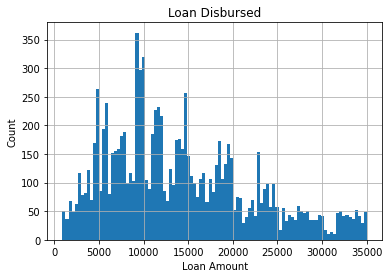

In [ ]:
fig = df['disbursed_amount'].hist(bins = 100)
fig.set_title('Loan Disbursed')
fig.set_xlabel('Loan Amount')
fig.set_ylabel('Count')

In [ ]:
# rate of interest

Text(0, 0.5, 'Count')

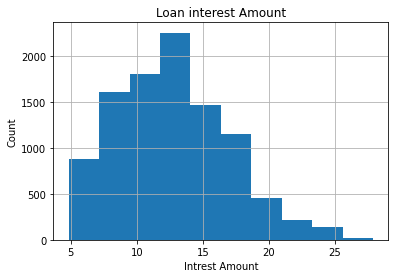

In [ ]:
fig = df['interest'].hist(bins = 10)
fig.set_title('Loan interest Amount')
fig.set_xlabel('Intrest Amount')
fig.set_ylabel('Count')

In [ ]:
df['interest'].describe()

count    10000.000000
mean        12.678819
std          4.214989
min          4.841200
25%          9.490000
50%         12.396900
75%         15.475500
max         27.880000
Name: interest, dtype: float64

Text(0, 0.5, 'Number of Customers')

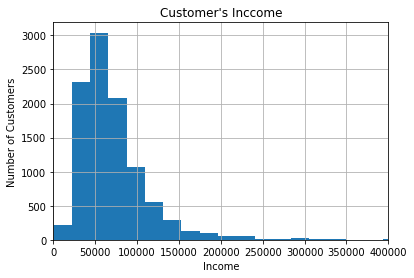

In [ ]:
fig  = df['income'].hist(bins =100)
fig.set_xlim(0, 400000)

# title and axis legends
fig.set_title("Customer's Inccome")
fig.set_xlabel('Income')
fig.set_ylabel('Number of Customers')

In [ ]:
df[df['income'] == 0.000000e+00]

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
2126,2126,18400.0,16.1405,D,NaN,NaN,MORTGAGE,0.0,2015-12-07,0,Debt consolidation,9.0,2016-01-11,2.0


In [ ]:
def get_discrete(data_frame):
  cats = [];
  for col in df.columns:
    if df[col].dtype == 'O':
      cats.append(col)
  return cats;

cat_vars = get_discrete(df)


In [ ]:
cat_vars

['market',
 'employment',
 'time_employed',
 'householder',
 'date_issued',
 'loan_purpose',
 'date_last_payment']

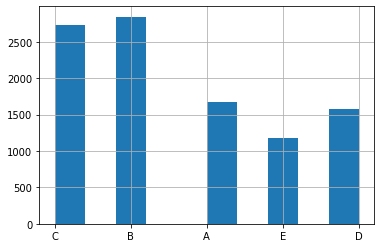

In [ ]:
df['market'].hist()

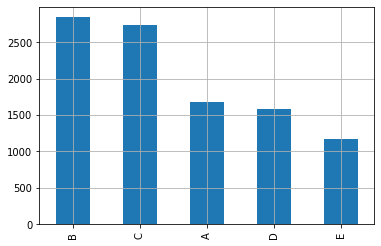

In [ ]:
fig = df['market'].value_counts().plot.bar()
fig.grid()


In [ ]:
# date time variablee

In [ ]:
df['date_issued'] = pd.to_datetime(df['date_issued'])
df['date_last_payment'] = pd.to_datetime(df['date_last_payment'])

In [ ]:
df.dtypes

customer_id                        int64
disbursed_amount                 float64
interest                         float64
market                            object
employment                        object
time_employed                     object
householder                       object
income                           float64
date_issued               datetime64[ns]
target                             int64
loan_purpose                      object
number_open_accounts             float64
date_last_payment         datetime64[ns]
number_credit_lines_12           float64
dtype: object

In [ ]:
df['loan_issue_year'] = df['date_issued'].dt.year
df['loan_issue_month'] = df['date_issued'].dt.month
df['loan_issue_day'] = df['date_issued'].dt.day


df['payment_issue_year'] = df['date_last_payment'].dt.year
df['payment_issue_month'] = df['date_last_payment'].dt.month
df['payment_issue_day'] = df['date_last_payment'].dt.day


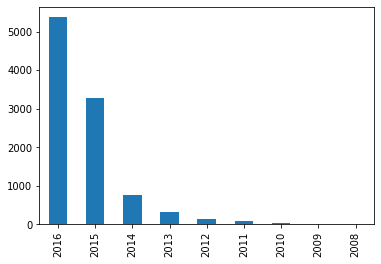

In [ ]:
fig1 = df['payment_issue_year'].value_counts().plot.bar()


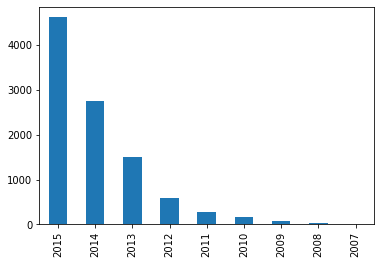

In [ ]:
fig2 = df['loan_issue_year'].value_counts().plot.bar()

In [ ]:
df.groupby(['loan_issue_year','market'])['disbursed_amount'].mean()

loan_issue_year  market
2007             A          1820.000000
                 B          2796.500000
                 E         13072.062500
2008             A          6358.750000
                 B          9309.562500
                 C          8060.888889
                 D          6170.000000
                 E          7049.350000
2009             A          7170.983333
                 B         10653.340909
                 C          9752.611111
                 D         11771.428571
                 E         11956.000000
2010             A          8240.793103
                 B          9864.288462
                 C          9927.633333
                 D          9611.357143
                 E         11032.772727
2011             A          7381.110795
                 B         11681.818182
                 C         11764.855556
                 D         13778.181818
                 E         16894.780303
2012             A         12088.385246
                

In [ ]:
from collections import defaultdict

def one_hot_vector(sent,_dict):
  words = sent.split()
  n = len(words)
  V = len(_dict)
  one_hot = [[0 for j in range(V)] for w in words]
  for i,word in enumerate(words):
    index = _dict[word]
    print(index)
    one_hot[i][index]  = 1
  return one_hot;

def parseWords(docs):
  counter = 0
  _dict = defaultdict(int)
  for doc in docs:  
    for word in doc.split():
      if word not in _dict:
        _dict[word] = counter
        counter+=1;
  print(_dict)
  return _dict;


def getOneHot(docs):
  _dict = parseWords(docs);
  for doc in docs:
    one_hot = one_hot_vector(doc,_dict)
    print(one_hot)



docs= ['not here ', 'here']
getOneHot(docs)



  


   




  

defaultdict(<class 'int'>, {'not': 0, 'here': 1})
0
1
[[1, 0], [0, 1]]
1
[[0, 1]]


In [ ]:
words = "I am here"


In [ ]:
words.split()

['I', 'am', 'here']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

processed_docs = ['i am hereot sing','i just sleeping now','do not worry just do not worry']

bow = count_vect.fit_transform(processed_docs)

count_vect.vocabulary_




{'am': 0,
 'do': 1,
 'hereot': 2,
 'just': 3,
 'not': 4,
 'now': 5,
 'sing': 6,
 'sleeping': 7,
 'worry': 8}

In [ ]:
bow[2].toarray()

array([[0, 2, 0, 1, 2, 0, 0, 0, 2]])

In [ ]:
temp = count_vect.transform(['I am not urs'])

In [ ]:
temp.toarray()

array([[1, 0, 0, 0, 1, 0, 0, 0, 0]])

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = TfidfVectorizer()

processed_docs = ['dog bites man','man bites dog','dog loves dog']

bow = count_vect.fit_transform(processed_docs)

count_vect.get_feature_names()


['bites', 'dog', 'loves', 'man']

In [64]:
count_vect.idf_


array([1.28768207, 1.        , 1.69314718, 1.28768207])

In [84]:

temp1 = count_vect.transform(['man man man'])
t1 = temp1.toarray()

In [87]:
temp2 = count_vect.transform(['dog dog dog'])
t2 = temp2.toarray()

In [88]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(t1,t2)

array([[0.]])

In [89]:
# word2vec

In [111]:
from gensim.models import Word2Vec, KeyedVectors
#Import a test data set provided in gensim to train a model
from gensim.test.utils import common_texts
#Build the model, by selecting the parameters.
our_model = Word2Vec(common_texts, size=100, window=2, min_count=1, workers=4)
#Save the model
our_model.save("tempmodel.w2v")
#Inspect the model by looking for the most similar words for a test word.
print(our_model.wv.most_similar("survey", topn=5))
#Let us see what the 10-dimensional vector for 'computer' looks like.
print(our_model["survey"])



[('user', 0.18055182695388794), ('interface', 0.10640821605920792), ('computer', 0.10472408682107925), ('system', 0.10093532502651215), ('human', 0.02475559711456299)]
[ 2.9383397e-03  4.4253324e-03 -2.3026140e-03 -1.3372502e-03
  2.4423876e-03 -4.5918864e-03  7.6833786e-04 -1.9241157e-03
 -4.1401634e-04  2.1260399e-03  2.3718238e-04  3.9057891e-04
  1.6038989e-04  4.8949379e-03 -1.3919523e-03 -2.4273479e-03
  2.2104781e-03  2.2834886e-03 -3.6806485e-03  4.2317114e-03
 -1.5460475e-03 -3.1447853e-03 -1.6976561e-03  3.0850533e-03
  3.5244138e-03  3.3549143e-03 -3.9928476e-03  4.9866773e-03
 -2.9420471e-03 -3.1559004e-03 -3.5880955e-03 -1.2719427e-03
  4.0462660e-03  1.4190146e-03  4.2135455e-03 -2.6579171e-03
  2.2459619e-03  4.8404401e-03 -3.7245417e-03 -1.6588221e-03
  3.4885113e-03  4.5088402e-04 -3.0078592e-03 -2.2298966e-03
  1.1468143e-04 -3.5098728e-03  1.4050077e-03  4.9176527e-04
 -2.6889609e-03 -4.5063039e-03  1.3367131e-03  3.7268514e-03
  2.1785342e-03  1.9220191e-03  3.83948

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [110]:
print(common_texts)

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


In [102]:
# text Analysis 

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 

categories = ['alt.atheism', 'comp.graphics']
twenty_train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)
#X_train,Y_train,X_test,Y_test =  train_test_split(twenty_train.data,twenty_train.target)
count_vect = TfidfVectorizer()

X = count_vect.fit_transform(twenty_train.data)


X_train,X_test,Y_train,Y_test =  train_test_split(X,twenty_train.target,train_size = 0.7)

In [106]:
# modelling '

from sklearn.naive_bayes import MultinomialNB

nbc = MultinomialNB().fit(X_train, Y_train)
print('Test Accuracy:',nbc.score(X_test,Y_test))
print('Train accuracy:',nbc.score(X_train,Y_train))

Test Accuracy: 0.99375
Train accuracy: 0.9986559139784946


array([[1.        , 0.        ],
       [0.01183432, 0.98816568]])

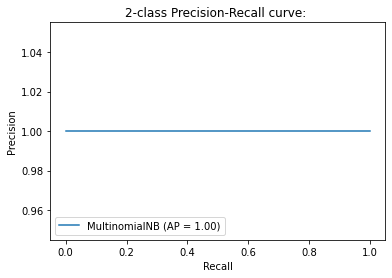

In [108]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


disp = plot_precision_recall_curve(nbc, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ')


from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, nbc.predict(X_test),normalize = 'true')


In [59]:
import numpy as np
np.unique(Y_train)

array([0, 1])

Text(0.5, 1.0, '2-class Precision-Recall curve: ')

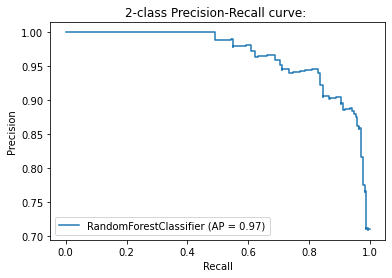

In [121]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth = 2)

rfc.fit(X_train,Y_train)

rfc.score(X_train,Y_train)

disp = plot_precision_recall_curve(rfc, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ')

Text(0.5, 1.0, '2-class Precision-Recall curve: ')

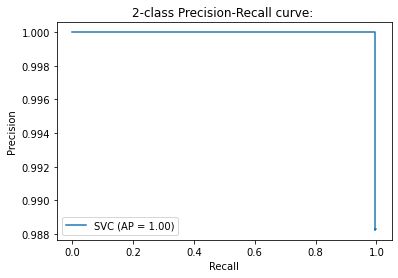

In [142]:
from sklearn.svm import SVC
svc  = SVC(C=1.2)

svc.fit(X_train,Y_train)

svc.score(X_train,Y_train)
disp = plot_precision_recall_curve(svc, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ')



In [143]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, svc.predict(X_test),normalize = 'true')

array([[0.98013245, 0.01986755],
       [0.        , 1.        ]])

In [ ]:
# Deep Learning Models 
